                         Titanic: Who survived and what let to someones survival?

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Loading and exploring data:

In [134]:
df=pd.read_csv('titanic_train.csv')

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


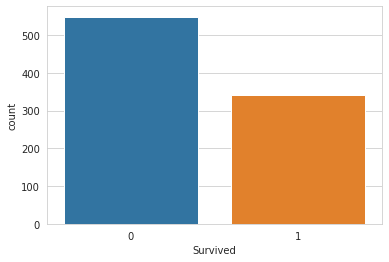

In [137]:
sns.countplot(x='Survived', data=df)

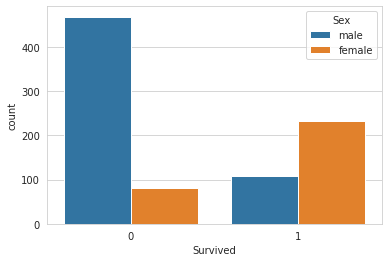

In [138]:
sns.countplot(x='Survived', hue='Sex', data=df)

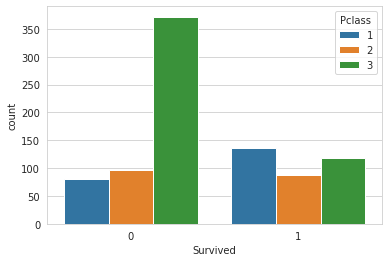

In [139]:
sns.countplot(x='Survived', hue='Pclass', data=df)

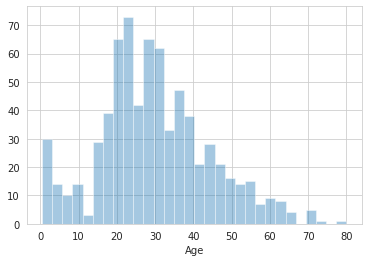

In [140]:
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

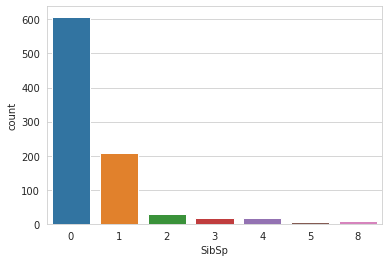

In [141]:
sns.countplot(x='SibSp', data=df)

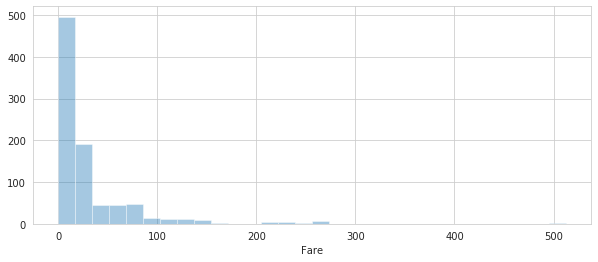

In [142]:
plt.figure(figsize=(10,4))
sns.distplot(df['Fare'], kde=False, bins=30)

In [143]:
df['Fare'].iplot(kind='hist', bins=30, color='blue')

Cleaning data:

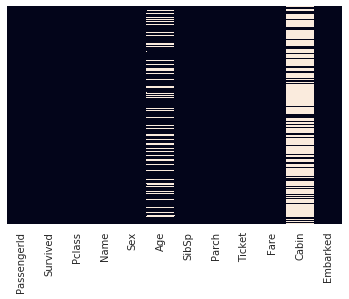

In [144]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

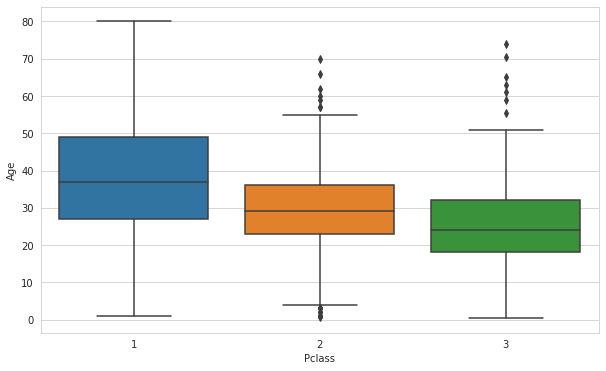

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df)

In [146]:
def fill_age(x):
    Age=x[0]
    Pclass=x[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return df[df['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return df[df['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return df[df['Pclass']==3]['Age'].mean()
    else:
        return Age
    

In [147]:
df['Age']=df[['Age','Pclass']].apply(fill_age, axis=1)

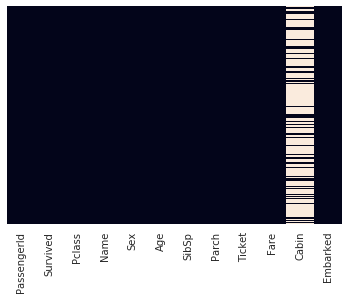

In [148]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [149]:
df.drop('Cabin', axis=1, inplace=True)

In [150]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [151]:
df.dropna(inplace=True)

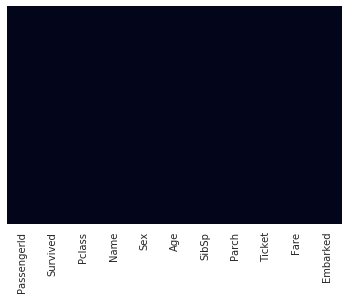

In [152]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [153]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
embark=pd.get_dummies(df['Embarked'], drop_first=True)
df=pd.concat([df, sex, embark], axis=1)
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [154]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


Building the model:

In [158]:
X=df.drop('Survived', axis=1)
y=df['Survived']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:
logmodel=LogisticRegression(max_iter=500)

In [166]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
prediction=logmodel.predict(X_test)

Evaluation:

In [169]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [171]:
print(confusion_matrix(y_test, prediction))

[[156  28]
 [ 26  84]]
